In [1]:
from __future__ import annotations

import datasets
from tqdm import tqdm


def process(
    dataset_name: str,
    *,
    id_column: str,
    natoms_column: str,
    atomic_numbers_column: str,
    split: str = "train",
    count: int = 10_000,
):
    ids = set()

    natoms = []
    atomic_numbers = []

    i = 0
    pbar = tqdm(total=count)
    for data_dict in datasets.load_dataset(dataset_name, split=split, streaming=True):
        if i >= count:
            break

        id = data_dict[id_column]
        if id in ids:
            continue

        i += 1
        pbar.update(1)

        ids.add(id)
        natoms.append(data_dict[natoms_column])
        atomic_numbers.append(data_dict[atomic_numbers_column])

    return {"natoms": natoms, "atomic_numbers": atomic_numbers}


stats = {}

In [ ]:
stats["mptrj"] = process(
    "nimashoghi/mptrj",
    id_column="mp_id",
    natoms_column="num_atoms",
    atomic_numbers_column="numbers",
)

In [5]:
stats["wbm"] = process(
    "nimashoghi/wbm",
    id_column="material_id",
    natoms_column="num_atoms",
    atomic_numbers_column="atomic_numbers",
)

























  0%|          | 0/10000 [00:27<?, ?it/s]










































100%|██████████| 10000/10000 [00:09<00:00, 1063.91it/s]


In [7]:
stats["wbm"].keys()

dict_keys(['natoms', 'atomic_numbers'])

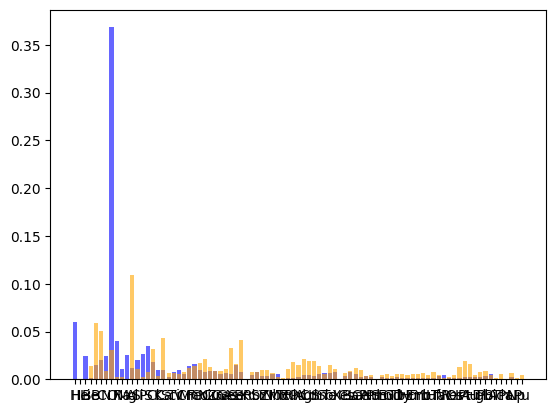

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from ase.data import chemical_symbols

# Create a mapping from atomic number to symbol
atomic_number_to_symbol = {num: symbol for num, symbol in enumerate(chemical_symbols)}

# Initialize plot
fig, ax = plt.subplots()

# Colors for each dataset
colors = {"mptrj": "blue", "wbm": "orange"}

for dataset, s in stats.items():
    atomic_numbers_flat = np.concatenate(s["atomic_numbers"])
    # Compute unique atomic numbers and their densities
    unique_atomic_numbers, counts = np.unique(atomic_numbers_flat, return_counts=True)
    densities = counts / len(atomic_numbers_flat)

    # Sort the atomic numbers and densities by atomic number
    sorted_indices = np.argsort(unique_atomic_numbers)
    sorted_atomic_numbers = unique_atomic_numbers[sorted_indices]
    sorted_densities = densities[sorted_indices]

    # Convert atomic numbers to symbols
    sorted_atomic_symbols = [
        atomic_number_to_symbol[num] for num in sorted_atomic_numbers
    ]

    # Plot the barplot with atomic symbols on the x-axis
    ax.bar(
        sorted_atomic_symbols,
        sorted_densities,
        color=colors[dataset],
        alpha=0.6,
        label=dataset.upper(),
    )


# Show the plot
plt.show()